**8.** Analysis of proportions: a survey was done of bicycle and other vehicular traffic in the
neighborhood of the campus of the University of California, Berkeley, in the spring of
1993. Sixty city blocks were selected at random; each block was observed for one hour,
and the numbers of bicycles and other vehicles traveling along that block were recorded.
The sampling was stratified into six types of city blocks: busy, fairly busy, and residential
streets, with and without bike routes, with ten blocks measured in each stratum. Table
3.3 displays the number of bicycles and other vehicles recorded in the study. For this
problem, restrict your attention to the first four rows of the table: the data on residential
streets.

**(a)** Let $y_1, . . . , y_{10}$ and $z_1, . . . , z_8$ be the observed proportion of traffic that was on bicycles
in the residential streets with bike lanes and with no bike lanes, respectively (so
$y_1 = 16/(16 + 58)$ and $z_1 = 12/(12 + 113)$, for example). Set up a model so that the
$y_i\,'s$ are independent and identically distributed given parameters $θ_y$ and the $z_i\,'s$ are
independent and identically distributed given parameters $θ_z$.

**(b)** Set up a prior distribution that is independent in $θ_y$ and $θ_z$.

**(c)** Determine the posterior distribution for the parameters in your model and draw 1000
simulations from the posterior distribution.

**(d)** Let $μ_y = E(y_i|θ_y)$ be the mean of the distribution of the $y_i\,'s$; $μ_y$ will be a function of
$θ_y$. Similarly, define μz. Using your posterior simulations from (c), plot a histogram of
the posterior simulations of $μ_y − μ_z$, the expected difference in proportions in bicycle
traffic on residential streets with and without bike lanes.

In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import arviz as az
import warnings
warnings.filterwarnings("ignore")
from toolz import concat

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
data = {'yes': [[16,58], [9,90], [10,48], [13,57], [19,103], [20,57], [18,86], [17,112], [35,273], [55,64]],
        'no': [[12,113], [1,18], [2,14], [4,44], [9,208], [7,67], [9,29], [8,154]]}

In [3]:
df = (pd.DataFrame({'route': ['yes'] * len(data['yes']) + ['no'] * len(data['no']),
                  'bicycles': list(concat([map(lambda x: x[0], i) for i in data.values()])),
                  'vehicles': list(concat([map(lambda x: sum(x), i) for i in data.values()]))}))
df = df.assign(p = df['bicycles'] / df['vehicles'])

In [4]:
print(df.head())

  route  bicycles  vehicles         p
0   yes        16        74  0.216216
1   yes         9        99  0.090909
2   yes        10        58  0.172414
3   yes        13        70  0.185714
4   yes        19       122  0.155738


In [5]:
idx = pd.factorize(df['route'])[0]

In [6]:
with pm.Model() as model:
    θ = pm.Beta('θ', 1, 1, shape = 2)
    y = pm.Binomial('y', n = df['vehicles'], p = θ[idx], observed = df['bicycles'])
    δ = pm.Deterministic('δ', θ[0] - θ[1])
    trace = pm.sample(2000, return_inferencedata = True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [θ]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 23 seconds.


In [7]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
θ[0],0.183,0.011,0.162,0.204,0.0,0.0,3442.0,3028.0,1.0
θ[1],0.076,0.010,0.057,0.094,0.0,0.0,3742.0,2577.0,1.0
δ,0.108,0.015,0.080,0.135,0.0,0.0,3481.0,2786.0,1.0


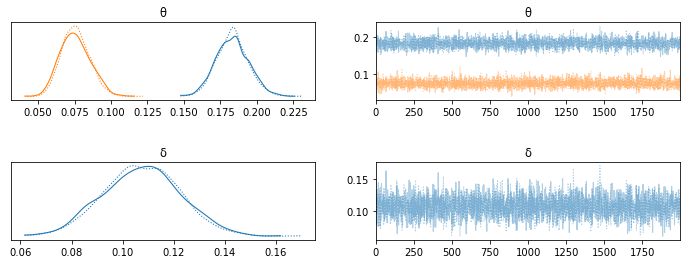

In [8]:
az.plot_trace(trace)
plt.subplots_adjust(hspace = 0.8, wspace=0.2);

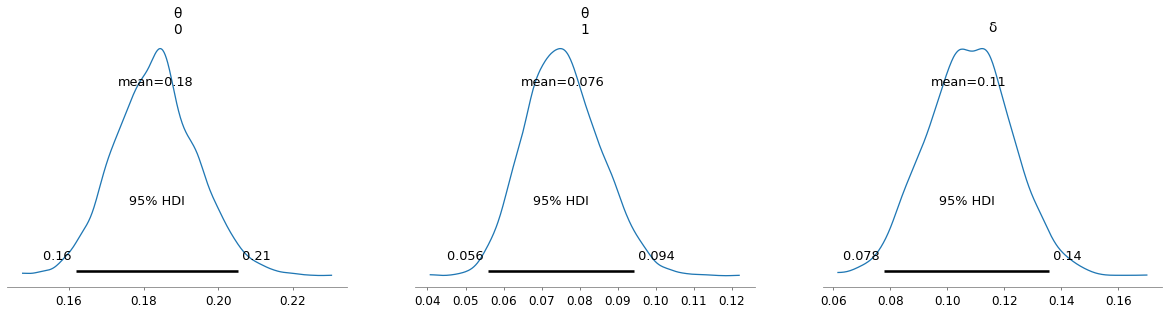

In [9]:
az.plot_posterior(trace, hdi_prob = 0.95, textsize = 12);